In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("insurance.csv")

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df.shape

(1338, 7)

In [43]:
print('The row count of the dataset', df.shape[0] )

The row count of the dataset 1338


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
df.duplicated().sum()

1

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

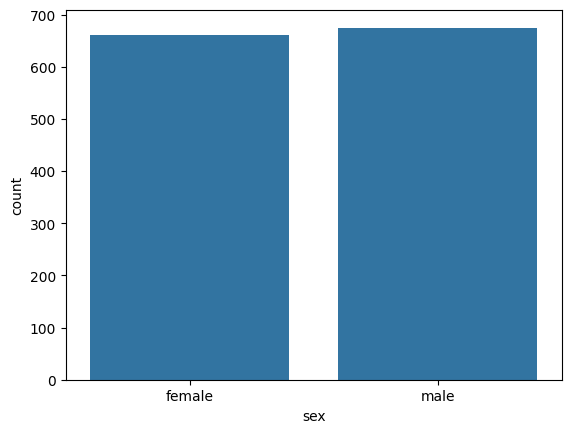

In [51]:
sns.countplot(data=df, x='sex')
plt.show()

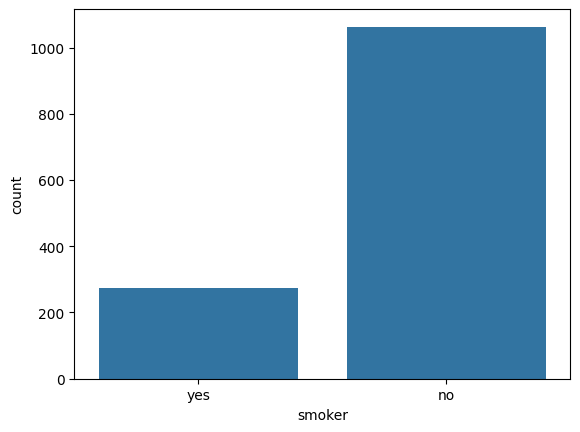

In [52]:
sns.countplot(data=df, x='smoker')
plt.show()

<Axes: xlabel='region', ylabel='count'>

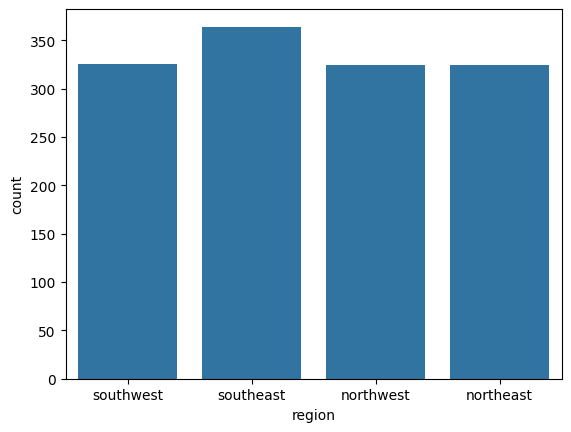

In [53]:
sns.countplot(data=df, x='region')

In [54]:
from sklearn import preprocessing

#prep for one-hot encoding to convert categorical data to numerical data
labelencoder = preprocessing.LabelEncoder()

In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
#enabling one-hot encoding to convert categorical data to numerical data
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [61]:
#seeing the correlation of variables to charges
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

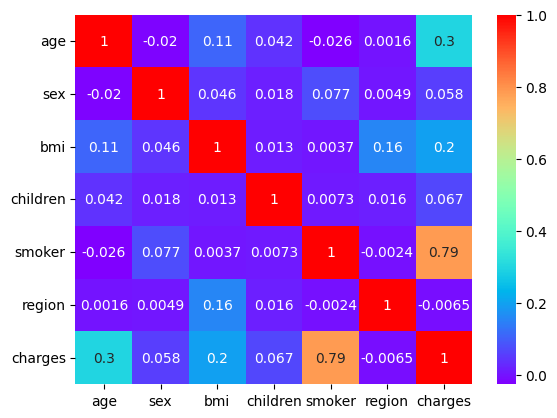

In [66]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

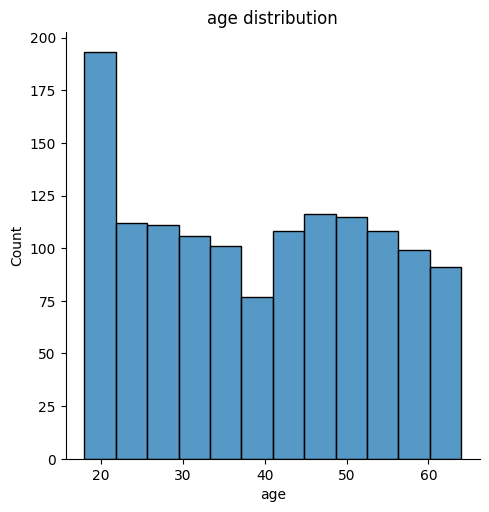

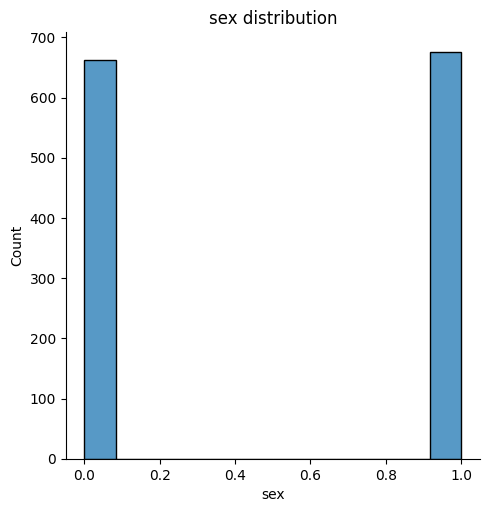

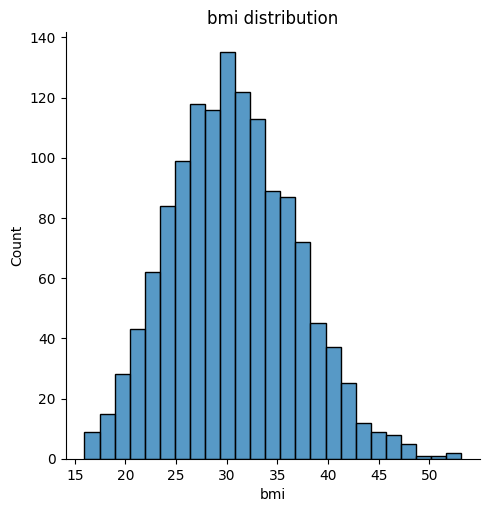

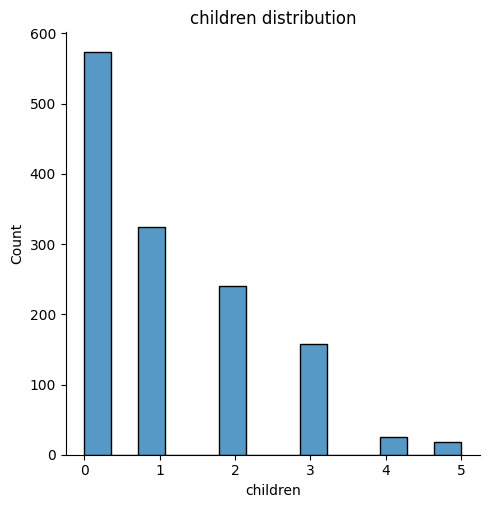

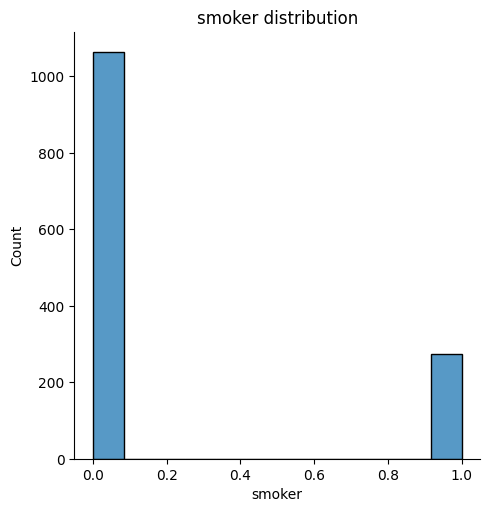

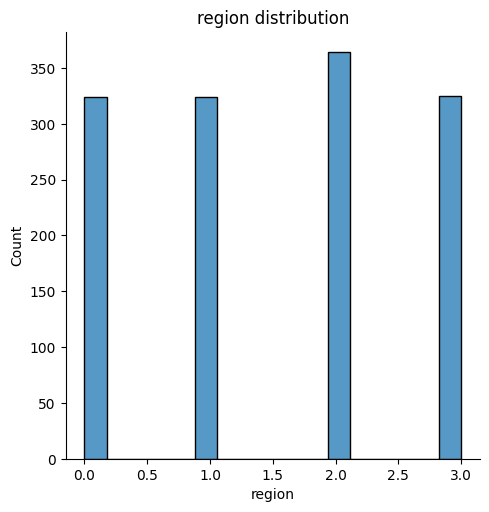

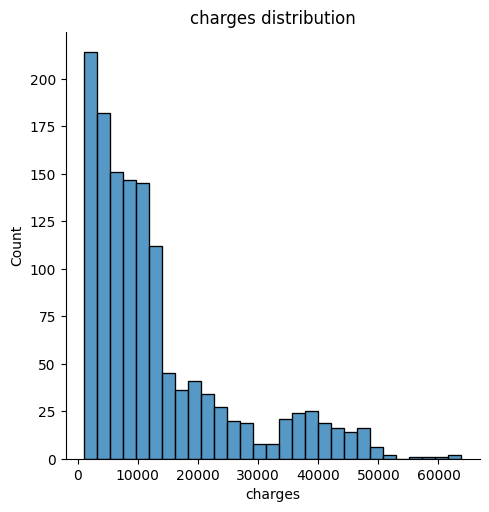

In [67]:
# show distribution
for i in df.columns:
    sns.displot(df[i])
    plt.title(i + " " + "distribution")
    plt.show()

In [71]:
colorsforx = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Grey']
colorchanger = 0

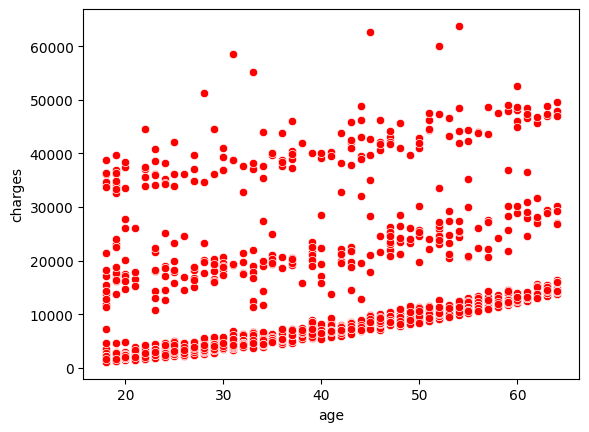

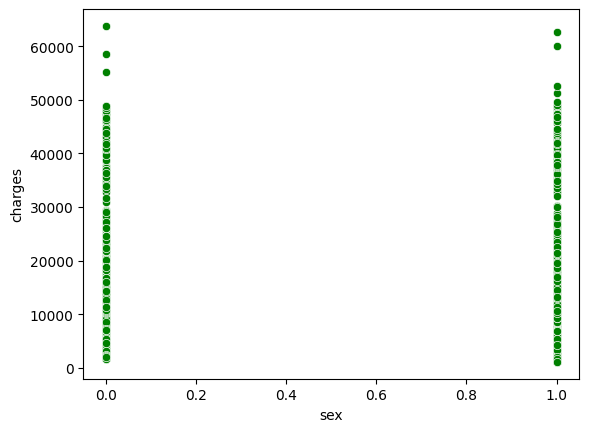

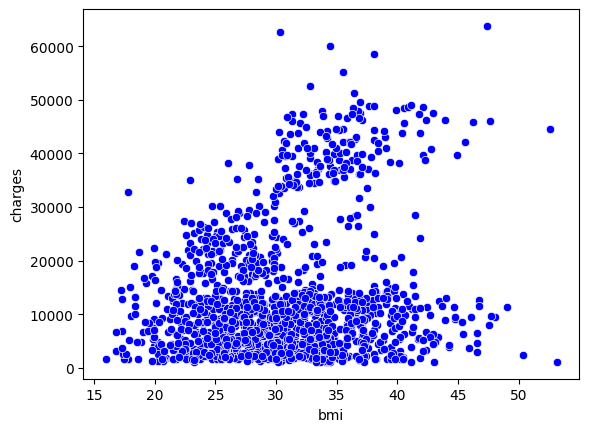

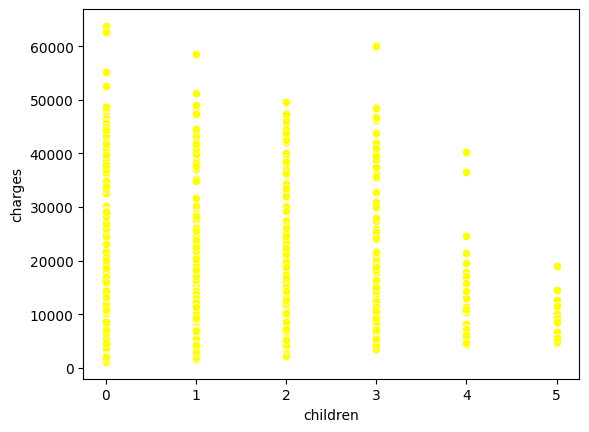

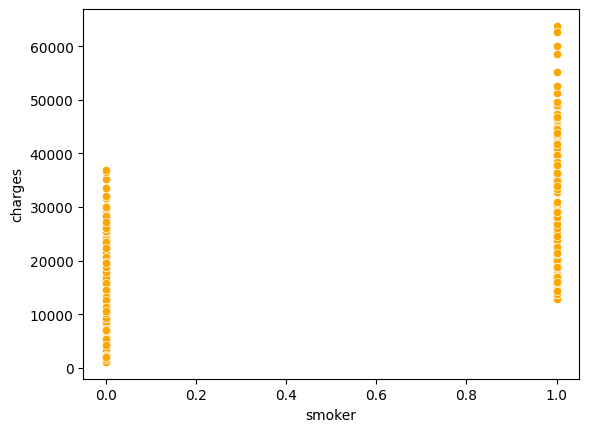

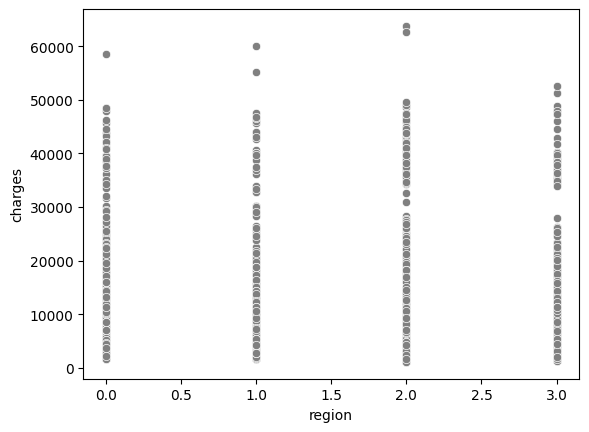

In [72]:
for i in df.columns[:-1]:
    sns.scatterplot(data = df, x= i, y='charges', color = colorsforx[colorchanger])
    plt.show()
    colorchanger += 1